In [20]:
import pandas as pd
df=pd.read_excel("C:\\Users\\SAI REVANTH\\Downloads\\Lab4.xlsx")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from math import log2


# Separate the target variable
y = df['buys_computer']
X = df.drop('buys_computer', axis=1)

# Define categorical columns for one-hot encoding
categorical_columns = ['age', 'income', 'student', 'credit_rating']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Create a pipeline to preprocess and fit the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X, y)

# Get the depth of the constructed tree
tree_depth = model.get_depth()

print(f"The depth of the Decision Tree is: {tree_depth}")

# Calculate the entropy of the target variable 'buys_computer'
def entropy(df):
    total_count = len(df)
    if total_count == 0:
        return 0
    counts = df.value_counts()
    entropy = -sum((count / total_count) * log2(count / total_count) for count in counts)
    return entropy

# Calculate the information gain for a specific attribute
def information_gain(df, attribute):
    # Calculate the entropy of the root node
    root_entropy = entropy(df['buys_computer'])

    # Calculate the weighted average of entropies for each attribute value
    attribute_values = df[attribute].unique()
    weighted_entropy = 0

    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_entropy = entropy(subset['buys_computer'])
        weight = len(subset) / len(df)
        weighted_entropy += weight * subset_entropy

    # Calculate information gain
    information_gain_value = root_entropy - weighted_entropy
    return information_gain_value

# Calculate information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for attribute in attributes:
    gain = information_gain(df, attribute)
    information_gains[attribute] = gain

# Find the attribute with the highest information gain
best_attribute = max(information_gains, key=information_gains.get)

print("\nInformation Gains:")
for attribute, gain in information_gains.items():
    print(f"{attribute}: {gain}")

print(f"\nThe first feature for constructing the decision tree: {best_attribute}")


The depth of the Decision Tree is: 4

Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949

The first feature for constructing the decision tree: age


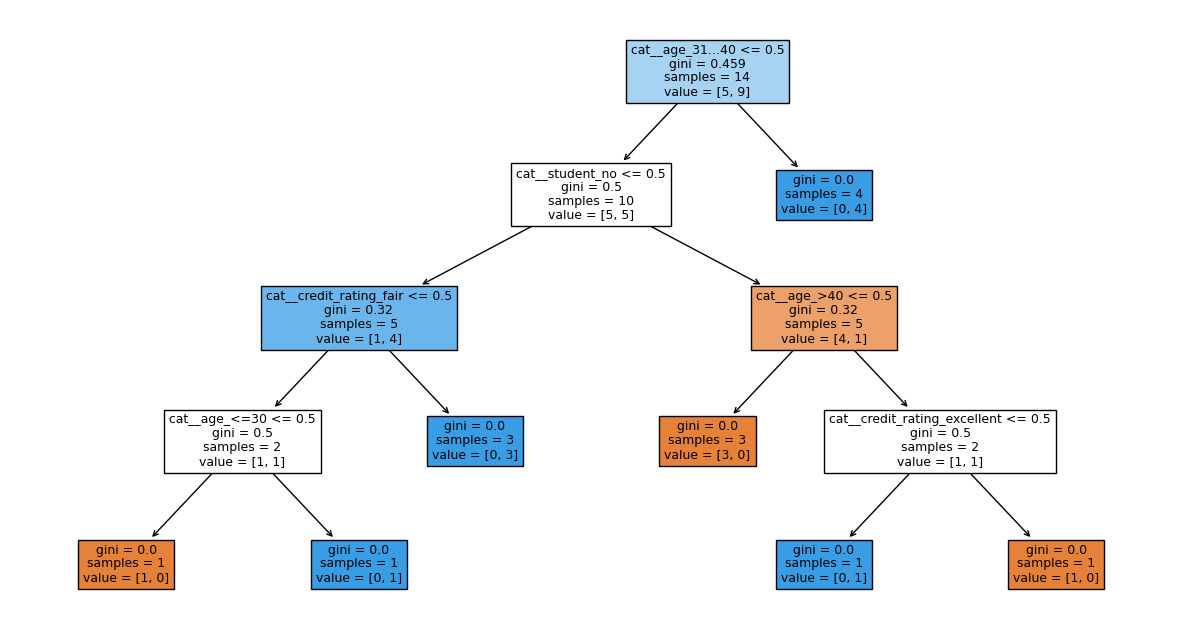

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Decision Tree model (as previously defined)
model = DecisionTreeClassifier()

# Create a pipeline to preprocess and fit the model (as previously defined)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X, y)

# Visualize the constructed tree
plt.figure(figsize=(15, 8))  # You can adjust the figsize as needed
plot_tree(model, filled=True, feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=categorical_columns))
plt.show()